# 1. Contexto y Motivación del Proyecto 🎯

Durante las últimas décadas, la salud mental se ha convertido en un tema de ***alta relevancia***, siendo uno de los mayores desafíos de salud pública en todo el mundo. Organismos como la Organización Mundial de la Salud (OMS) nos muestran cómo los casos de trastornos mentales han aumentado de forma considerable, afectando tanto a jóvenes como adultos en edad laboral.

Si bien existen diversos factores que influyen en estas cifras, el ***ámbito laboral*** es uno de los principales ambientes que pueden afectar el bienestar psicológico de una persona, en donde, en esta época, es común que se generen situaciones de estrés, exceso de trabajo, inseguridad laboral, etc.

### El Impacto del Teletrabajo Post-Pandemia

Posterior a la pandemia, las modalidades de trabajo normal se vieron forzadas a adaptarse al confinamiento, por lo que surgieron alternativas como modalidades de trabajo ***remoto e híbrido***. En la actualidad, muchas de estas opciones se mantienen debido a diversas ventajas, siendo algunas: mayor ahorro de tiempo, mayor flexibilidad y mejor equilibrio entre vida personal y trabajo, entre otras.

Sin embargo, junto con estas ventajas, estas modalidades pueden traer consigo también ciertas desventajas, como por ejemplo:
* Dificultades para desconectarse de los requisitos del trabajo.
* Paranoia de productividad.
* Separar el trabajo de la vida privada.
* Incluso otros riesgos psicosociales como el **aislamiento** (Int. J. Environ. Res. Salud Pública 2022).

Frente a estas evidencias, resulta fundamental estudiar cómo la ***modalidad de trabajo afecta el bienestar del trabajador***. Por ello, en este proyecto recolectamos diversos datos (obtenidos de diversos *datasets* de Kaggle) que exploren esta relación, evaluando también otros factores como la productividad y rendimiento del mismo. Luego, a partir de un análisis de los datos usados, esperamos encontrar patrones y tendencias que respondan esta interrogante. También se espera entregar **información accionable** que ayude a promover entornos laborales más sostenibles y beneficiosos tanto para empleadores como para trabajadores.

---

## 2. Preguntas Objetivo ❓

### Pregunta Principal:

> **¿Cómo influye la modalidad de trabajo (remoto o presencial) en la salud mental de los trabajadores y cómo se relaciona esta con su nivel de productividad?**

### Preguntas Específicas:

1.  ¿Existen diferencias significativas en los niveles de estrés en trabajadores remotos y presenciales?
2.  ¿La modalidad de trabajo (remoto o presencial) influye en los niveles de satisfacción laboral y bienestar emocional?
3.  ¿Los trabajadores remotos reportan mayor o menor equilibrio entre vida personal y laboral en comparación con los presenciales, y cómo impacta esto en su rendimiento?
4.  ¿Se observa una correlación entre salud mental y productividad dentro de cada modalidad de trabajo?
5.  ¿Qué factores pueden influir en el resultado de los datos estudiados? (nueva)

# 3. Datos: Recolección, Preparación y Transformación

## 3.1 Origen y Estructura de los Datos (Subtítulo)

Los datos utilizados provienen de la plataforma Kaggle y se centran en el impacto del teletrabajo en la salud mental y la productividad. Se seleccionaron cuatro datasets principales de los cinco disponibles, ya que uno de ellos ("remote_worker_productivity_1000.csv") fue excluido porque no compara datos entre precencial y remoto entonces no se puede sacar concluciones de este

| Archivo | Fuente (Kaggle URL) |
| :--- | :--- |
| **`Mental Health Of Remote Workers.csv`** |[https://www.kaggle.com/datasets/abhishekjaiswal4896/mental-health-of-remote-workers](https://www.kaggle.com/datasets/abhishekjaiswal4896/mental-health-of-remote-workers) |
| **`Impact_of_Remote_Work_on_Mental_Health.csv`** | [https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health](https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health) |
| **`remote_work_productivity.csv`** | [https://www.kaggle.com/datasets/mrsimple07/remote-work-productivity](https://www.kaggle.com/datasets/mrsimple07/remote-work-productivity) |
| **`remote_worker_productivity_1000.csv`** |[https://www.kaggle.com/datasets/ziya07/remote-worker-productivity-dataset](https://www.kaggle.com/datasets/ziya07/remote-worker-productivity-dataset) |
| **`Remote Work Of Health Impact Survey June 2025.csv`** |[https://www.kaggle.com/datasets/kshitijsaini121/remote-work-of-health-impact-survey-june-2025/data](https://www.kaggle.com/datasets/kshitijsaini121/remote-work-of-health-impact-survey-june-2025/data) |

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Lectura y creacion de dataframes

In [2]:
#Lectura y crecion de df
path = os.path.join('..', 'data', 'mental_health_remote_workers.csv')
df_mental = pd.read_csv(path)

path = os.path.join('..', 'data', 'Impact_of_Remote_Work_on_Mental_Health.csv')
df_impact = pd.read_csv(path)

ruta = os.path.join("..", "data", "Remote Work Of Health Impact Survey June 2025.csv")
df_survey = pd.read_csv(ruta, delimiter = ",")

ruta = os.path.join("..", "data", "remote_work_productivity.csv")
df_productivity = pd.read_csv(ruta)


### Cambio de nombre de columnas a español

In [3]:
columna_survey = {
    "Survey_Date": "Fecha_encuesta",
    "Age": "Edad",
    "Gender": "Genero",
    "Region": "Region",
    "Industry": "Industria",
    "Job_Role": "Cargo",
    "Work_Arrangement": "Ubicacion_de_Trabajo",
    "Hours_Per_Week": "Horas_Trabajadas_Por_Semana",
    "Mental_Health_Status": "Condicion_de_Salud_Mental",
    "Burnout_Level": "Nivel_de_Estres",
    "Work_Life_Balance_Score": "Calificacion_de_Equilibrio_Trabajo_Vida",
    "Physical_Health_Issues": "Problemas_salud_fisica",
    "Social_Isolation_Score": "Calificacion_de_Aislamiento_Social",
    "Salary_Range": "Rango_salarial",
}

columnas_impact = {
    'Employee_ID': 'ID_Empleado',
    'Age': 'Edad',
    'Gender': 'Genero',
    'Job_Role': 'Rol_de_Trabajo',
    'Industry': 'Industria',
    'Years_of_Experience': 'Años_de_Experiencia',
    'Work_Location': 'Ubicacion_de_Trabajo',
    'Hours_Worked_Per_Week': 'Horas_Trabajadas_Por_Semana',
    'Number_of_Virtual_Meetings': 'Numero_de_Reuniones_Virtuales',
    'Work_Life_Balance_Rating': 'Calificacion_de_Equilibrio_Trabajo_Vida',
    'Stress_Level': 'Nivel_de_Estres',
    'Mental_Health_Condition': 'Condicion_de_Salud_Mental',
    'Access_to_Mental_Health_Resources': 'Acceso_a_Recursos_de_Salud_Mental',
    'Productivity_Change': 'Cambio_de_Productividad',
    'Social_Isolation_Rating': 'Calificacion_de_Aislamiento_Social',
    'Satisfaction_with_Remote_Work': 'Satisfaccion_con_Trabajo_Remoto',
    'Company_Support_for_Remote_Work': 'Apoyo_de_la_Empresa_para_Trabajo_Remoto',
    'Physical_Activity': 'Actividad_Fisica',
    'Sleep_Quality': 'Calidad_del_Sueño',
    'Region': 'Region'
}

columnas_mental = {
    'Employee_ID': 'ID_Empleado',
    'Name': 'Nombre',
    'Age': 'Edad',
    'Gender': 'Genero',
    'Country': 'Pais',
    'Job_Role': 'Rol_de_Trabajo',
    'Experience_Years': 'Años_de_Experiencia',
    'Work_Mode': 'Ubicacion_de_Trabajo',
    'Hours_Worked_Per_Week': 'Horas_Trabajadas_Por_Semana',
    'Productivity_Score': 'Puntaje_de_Productividad',
    'Mental_Health_Status': 'Estado_de_Salud_Mental',
    'Burnout_Score': 'Puntaje_de_Agobio',
    'Sleep_Hours_Per_Day': 'Horas_de_Sueño_Por_Dia',
    'Exercise_Frequency': 'Frecuencia_de_Ejercicio',
    'Work_Life_Balance_Rating': 'Calificacion_de_Equilibrio_Trabajo_Vida',
    'Has_Access_To_Therapist': 'Acceso_a_Terapeuta',
    'Willing_To_Return_Onsite': 'Disposicion_a_Regresar_Presencialmente',
    'Remote_Setup_Satisfaction': 'Satisfaccion_con_Configuracion_Remota',
    'Internet_Issues_Frequency': 'Frecuencia_de_Problemas_de_Internet',
    'Team_Communication_Effectiveness': 'Eficacia_en_Comunicacion_del_Equipo'
}

df_productivity = df_productivity.rename(columns={
    "Employee_ID": "ID trabajador",
    "Employment_Type": "Ubicacion_de_Trabajo",
    "Hours_Worked_Per_Week": "Horas_Trabajadas_Por_Semana",   
    "Productivity_Score": "Productividad",
    "Well_Being_Score": "Bienestar",
})

df_mental.rename(columns=columnas_mental, inplace=True)
df_survey = df_survey.rename(columns={k: v for k, v in columna_survey.items() if k in df_survey.columns})
df_impact.rename(columns=columnas_impact, inplace=True)

### Limpieza de repetidos

In [4]:
# REVISAMOS SI HAY DUPLICADOS
print("Duplicados:", df_productivity.duplicated().sum())

#ELIMINAR DUPLICADOS SI HAY
df_productivity = df_productivity.drop_duplicates()

# REVISAMOS SI HAY VALORES NULOS
print("Valores nulos por columna:")
print(df_productivity.isnull().sum())

Duplicados: 0
Valores nulos por columna:
ID trabajador                  0
Ubicacion_de_Trabajo           0
Horas_Trabajadas_Por_Semana    0
Productividad                  0
Bienestar                      0
dtype: int64


In [5]:
print("Duplicados:", df_mental.duplicated().sum())

#ELIMINAR DUPLICADOS SI HAY
df_mental = df_mental.drop_duplicates()

# REVISAMOS SI HAY VALORES NULOS
print("Valores nulos por columna:")
print(df_mental.isnull().sum())

Duplicados: 0
Valores nulos por columna:
ID_Empleado                                0
Nombre                                     0
Edad                                       0
Genero                                     0
Pais                                       0
Rol_de_Trabajo                             0
Años_de_Experiencia                        0
Ubicacion_de_Trabajo                       0
Horas_Trabajadas_Por_Semana                0
Puntaje_de_Productividad                   0
Estado_de_Salud_Mental                     0
Puntaje_de_Agobio                          0
Horas_de_Sueño_Por_Dia                     0
Frecuencia_de_Ejercicio                    0
Calificacion_de_Equilibrio_Trabajo_Vida    0
Acceso_a_Terapeuta                         0
Disposicion_a_Regresar_Presencialmente     0
Satisfaccion_con_Configuracion_Remota      0
Frecuencia_de_Problemas_de_Internet        0
Eficacia_en_Comunicacion_del_Equipo        0
dtype: int64


In [6]:
df_duplicados = df_survey[df_survey.duplicated(keep=False)]
print(df_duplicados.shape[0])
# REVISAMOS SI HAY VALORES NULOS
print("Valores nulos por columna:")
print(df_survey.isnull().sum())
# LOS 799 SON PERSONA SIN CONDICION SON IMPORTANTES

0
Valores nulos por columna:
Fecha_encuesta                               0
Edad                                         0
Genero                                       0
Region                                       0
Industria                                    0
Cargo                                        0
Ubicacion_de_Trabajo                         0
Horas_Trabajadas_Por_Semana                  0
Condicion_de_Salud_Mental                  799
Nivel_de_Estres                              0
Calificacion_de_Equilibrio_Trabajo_Vida      0
Problemas_salud_fisica                     280
Calificacion_de_Aislamiento_Social           0
Rango_salarial                               0
dtype: int64


In [7]:
df_duplicados = df_impact[df_impact.duplicated(keep=False)]
print(df_duplicados.shape[0])
# REVISAMOS SI HAY VALORES NULOS
print("Valores nulos por columna:")
print(df_impact.isnull().sum())
# LO MISMO QUE CON EL DATA ANTERIOR
# LOS NAN SON GENTE QUE NO HACE EJERCICIO
# NO TIENEN CONDICION DE SALUD MENTAL 

0
Valores nulos por columna:
ID_Empleado                                   0
Edad                                          0
Genero                                        0
Rol_de_Trabajo                                0
Industria                                     0
Años_de_Experiencia                           0
Ubicacion_de_Trabajo                          0
Horas_Trabajadas_Por_Semana                   0
Numero_de_Reuniones_Virtuales                 0
Calificacion_de_Equilibrio_Trabajo_Vida       0
Nivel_de_Estres                               0
Condicion_de_Salud_Mental                  1196
Acceso_a_Recursos_de_Salud_Mental             0
Cambio_de_Productividad                       0
Calificacion_de_Aislamiento_Social            0
Satisfaccion_con_Trabajo_Remoto               0
Apoyo_de_la_Empresa_para_Trabajo_Remoto       0
Actividad_Fisica                           1629
Calidad_del_Sueño                             0
Region                                        0
dtype: int6

#### Los nan que encontramos son solo gente que no pertencese a la columna o no hacen lo que dice la columna ya que las opciones no hay, no tengo no hago o cosas asi, se deduce que nan interpreta eso 

### Eliminacion de columnas

In [8]:
#### survey

df_survey.drop(['Fecha_encuesta','Edad','Industria' , 'Cargo' , 'Genero','Region', "Problemas_salud_fisica", "Rango_salarial"], axis=1, inplace=True)
#eliminamos la fecha ya que no es importante ante la comparacion de trabajo remoto y precencial encuanto a desempeño y salud mental, al igual que las otras columnas



In [9]:
#### mental
columnas_a_eliminar = [
    'Pais',
    'Edad',
    'Genero',
    'Frecuencia_de_Problemas_de_Internet',
    'Eficacia_en_Comunicacion_del_Equipo',
    'Rol_de_Trabajo',
    'Frecuencia_de_Ejercicio',
    'Años_de_Experiencia',	
    'Disposicion_a_Regresar_Presencialmente'
]
df_mental = df_mental.drop(columns=columnas_a_eliminar)


In [10]:
#### impact
df_impact.drop(['ID_Empleado', 'Genero', 'Industria', "Region", "Edad"	,"Rol_de_Trabajo",	"Años_de_Experiencia"], axis=1, inplace=True)
df_impact.drop_duplicates(inplace=True)

# 3.2 Revision de rangos 

----------------------------------------------------------------------------------------------------------

DataFrame productivity

In [11]:
#revisamos los rangos de las columnas de productividad y bienestar
print(df_productivity["Productividad"].min(), df_productivity["Productividad"].max())
print(df_productivity["Bienestar"].min(), df_productivity["Bienestar"].max())
df_productivity[["Productividad", "Bienestar"]].describe()

#asi sabemos el rango de la escala


33 112
14 104


,Productividad,Bienestar
count,1000.000000,1000.000000
mean,68.602000,63.975000
std,12.235494,13.870572
min,33.000000,14.000000
25%,60.000000,56.000000
50%,68.000000,65.000000
75%,76.000000,73.000000
max,112.000000,104.000000


In [12]:
#dejemos la escala de 1 a 100, eliminando valores fuera de rango 
df_productivity = df_productivity[(df_productivity["Productividad"] >= 1) & (df_productivity["Productividad"] <= 100)]
df_productivity = df_productivity[(df_productivity["Bienestar"] >= 1) & (df_productivity["Bienestar"] <= 100)]

In [13]:
#creamos dataframes seprados para cada modalidad
df_productivity_remoto = df_productivity[df_productivity["Ubicacion_de_Trabajo"] == "Remote"]
df_productivity_precencial = df_productivity[df_productivity["Ubicacion_de_Trabajo"] == "In-Office"]


----------------------------------------------------------------------------------------------------------

DataFrame mental

In [14]:
df_mental["Estado_de_Salud_Mental"].unique()

array(['Poor', 'Good', 'Moderate'], dtype=object)

In [15]:
print(df_mental["Horas_Trabajadas_Por_Semana"].max() , df_mental["Horas_Trabajadas_Por_Semana"].min())
print(df_mental["Puntaje_de_Productividad"].max() , df_mental["Puntaje_de_Productividad"].min())
print(df_mental["Puntaje_de_Agobio"].max() , df_mental["Puntaje_de_Agobio"].min())
print(df_mental["Calificacion_de_Equilibrio_Trabajo_Vida"].max() , df_mental["Calificacion_de_Equilibrio_Trabajo_Vida"].min())
print(df_mental["Horas_de_Sueño_Por_Dia"].max() , df_mental["Horas_de_Sueño_Por_Dia"].min())

52.9 31.4
9.9 3.1
87 10
10.0 2.0
8.9 4.1


revisando los datos todo esto entra en el rango pensado para cada columna 

----------------------------------------------------------------------------------------------------------

DataFrame survey

In [16]:
print(df_survey["Ubicacion_de_Trabajo"].unique())
print(df_survey["Condicion_de_Salud_Mental"].unique())
print(df_survey["Nivel_de_Estres"].unique())

['Onsite' 'Hybrid' 'Remote']
['Stress Disorder' 'ADHD' nan 'Burnout' 'Anxiety' 'PTSD' 'Depression']
['High' 'Medium' 'Low']


In [17]:
print(df_survey["Calificacion_de_Equilibrio_Trabajo_Vida"].max() , df_survey["Calificacion_de_Equilibrio_Trabajo_Vida"].min())
print(df_survey["Calificacion_de_Aislamiento_Social"].max() , df_survey["Calificacion_de_Aislamiento_Social"].min())
print(df_survey["Horas_Trabajadas_Por_Semana"].max() , df_survey["Horas_Trabajadas_Por_Semana"].min())

5 1
5 1
65 35


vemos que las calificaciones son de el 1 al 5 y no sesale de este rango asi que esta bien al igual las horas de trabajo son realista 

DataFrame impact

In [18]:
print(df_impact["Ubicacion_de_Trabajo"].unique())
print(df_impact["Condicion_de_Salud_Mental"].unique())
print(df_impact["Nivel_de_Estres"].unique())
print(df_impact["Calidad_del_Sueño"].unique())


['Hybrid' 'Remote' 'Onsite']
['Depression' 'Anxiety' nan 'Burnout']
['Medium' 'High' 'Low']
['Good' 'Poor' 'Average']


In [19]:
print(df_impact["Calificacion_de_Aislamiento_Social"].max() , df_impact["Calificacion_de_Aislamiento_Social"].min())
print(df_impact["Calificacion_de_Equilibrio_Trabajo_Vida"].max() , df_impact["Calificacion_de_Equilibrio_Trabajo_Vida"].min())
print(df_impact["Horas_Trabajadas_Por_Semana"].max() , df_impact["Horas_Trabajadas_Por_Semana"].min())

5 1
5 1
60 20


rangos realistas y no salen del rango 

In [20]:
df_impact

,Ubicacion_de_Trabajo,Horas_Trabajadas_Por_Semana,Numero_de_Reuniones_Virtuales,Calificacion_de_Equilibrio_Trabajo_Vida,Nivel_de_Estres,Condicion_de_Salud_Mental,Acceso_a_Recursos_de_Salud_Mental,Cambio_de_Productividad,Calificacion_de_Aislamiento_Social,Satisfaccion_con_Trabajo_Remoto,Apoyo_de_la_Empresa_para_Trabajo_Remoto,Actividad_Fisica,Calidad_del_Sueño
0,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good
1,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good
2,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor
3,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor
4,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average
4996,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average
4997,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor
4998,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average


# 4) Graficos y Analisis
---

### DataFrame productivity 

----------------------------------------------------------------------------------------------------------

**Gráfico:** Boxplot comparando la distribución de la `Productividad` según la `Ubicacion_de_Trabajo` (Remoto vs. Presencial).

Este análisis visual revela una **mediana de productividad más alta** para el grupo **Remoto** que para el grupo Presencial (*In-Office*). No obstante, la modalidad Remota exhibe una **mayor variabilidad** en el rendimiento (mayor dispersión y presencia de *outliers* bajos).

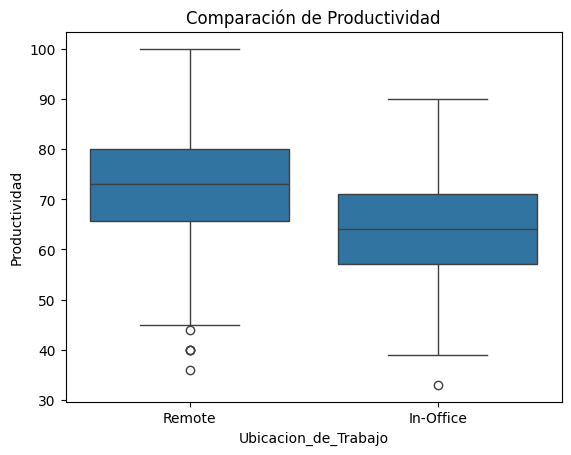

In [21]:
sns.boxplot(x="Ubicacion_de_Trabajo", y="Productividad", data=df_productivity)
plt.title("Comparación de Productividad")
plt.show()

----------------------------------------------------------------------------------------------------------

**Gráfico:** Boxplot que visualiza la distribución del `Bienestar` percibido según la `Ubicacion_de_Trabajo` (Remoto vs. Presencial).

Este análisis muestra una **mediana de Bienestar ligeramente superior** para los empleados **Remotos**. Sin embargo, es notable que el grupo **Presencial** (*In-Office*) exhibe una **variabilidad mucho mayor** en su distribución (mayor rango intercuartílico, caja más ancha). Además, el grupo Presencial concentra la mayoría de los *outliers* bajos, indicando casos extremos de bajo bienestar.

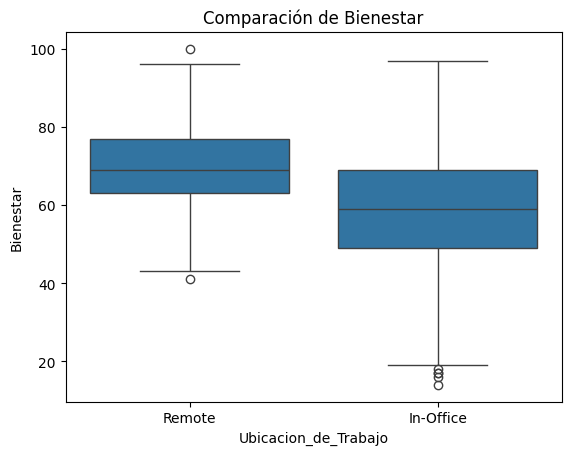

In [22]:
sns.boxplot(x="Ubicacion_de_Trabajo", y="Bienestar", data=df_productivity)
plt.title("Comparación de Bienestar")
plt.show()

----------------------------------------------------------------------------------------------------------

**Gráfico:** Gráfico de barras que compara los promedios de `Horas Trabajadas por Semana`, `Bienestar` y `Productividad` entre las modalidades Presencial (*In-Office*) y Remota.

Este gráfico de promedios muestra que la modalidad **Remota** es más **eficiente**: los empleados remotos trabajan **menos horas a la semana**, pero aun así consiguen tener **mejores promedios** tanto en **Bienestar** como en **Productividad** que sus compañeros presenciales.

In [23]:
#calculemos los promedios de horas de trabajo, productividad y bienestar por modalidad
promedios = df_productivity.groupby("Ubicacion_de_Trabajo")[["Horas_Trabajadas_Por_Semana", "Bienestar","Productividad"]].mean()
print(promedios)

                      Horas_Trabajadas_Por_Semana  Bienestar  Productividad
Ubicacion_de_Trabajo                                                       
In-Office                               44.430255  58.583497      63.789784
Remote                                  34.827731  69.577731      72.707983


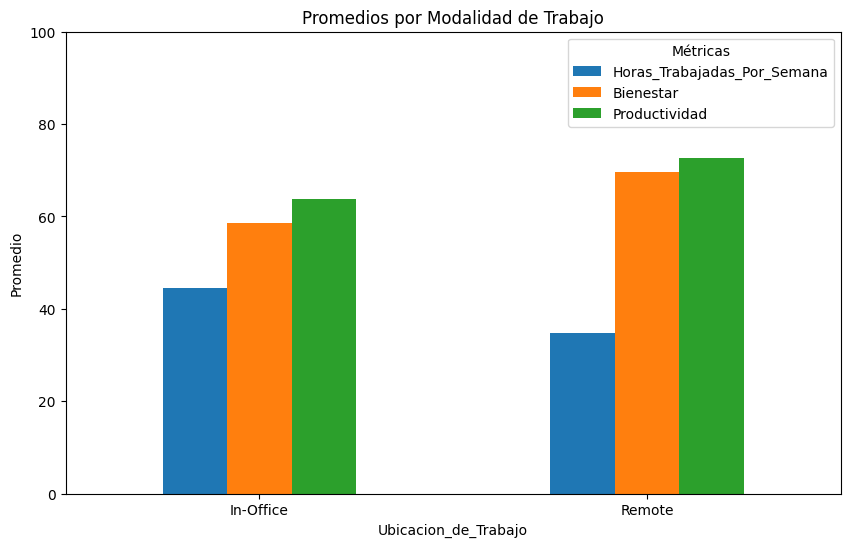

In [24]:
#creamos graficos para comparar mejor 
promedios.plot(kind='bar', figsize=(10, 6))
plt.title('Promedios por Modalidad de Trabajo')
plt.ylabel('Promedio')
plt.xticks(rotation=0)
plt.legend(title='Métricas')
plt.ylim(0,100)
plt.show()

----------------------------------------------------------------------------------------------------------

**Gráfico:** Gráfico de dispersión (`scatter plot`) que muestra la relación entre `Productividad` y `Bienestar`, diferenciando por `Ubicacion_de_Trabajo`.

Ambos gráficos muestran que la gente que está más cómoda tiene mejor rendimiento (**correlación positiva**). La diferencia clave es que el grupo **Remoto** (izquierda) tiene su gente **más concentrada** en la zona de puntajes **altos** (buen Bienestar y Productividad), mientras que el grupo **Presencial** (derecha) tiene su gente más dispersa y concentrada en puntajes **más bajos**. Esto confirma que el teletrabajo no solo mejora la media, sino que concentra a los empleados en el rango de alto rendimiento.

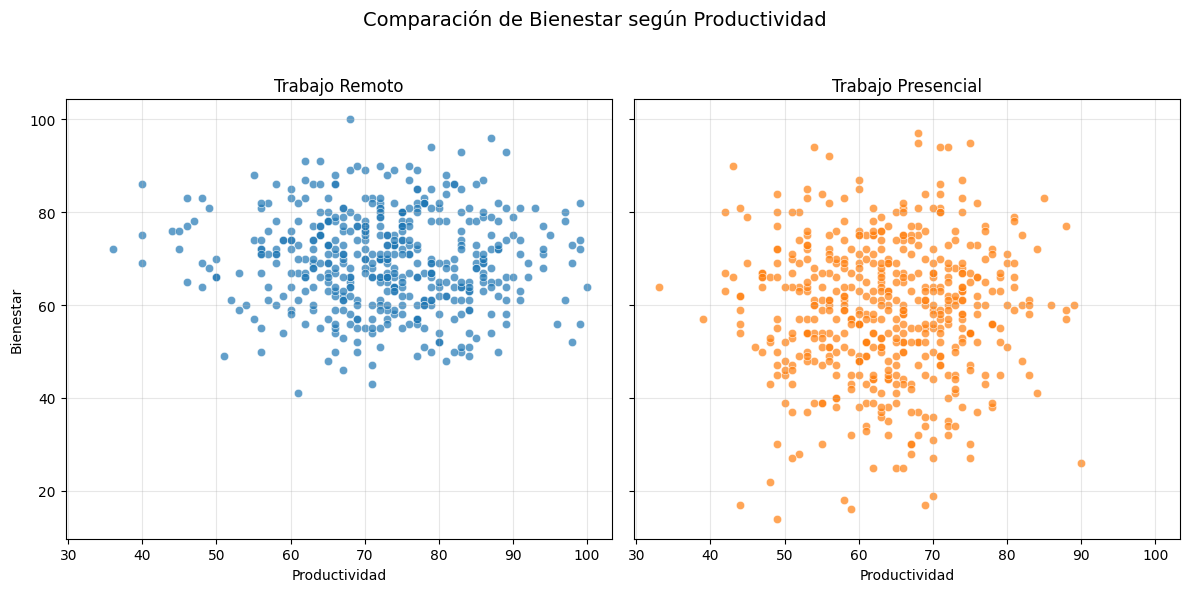

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# 1️⃣ Gráfico para trabajo remoto
sns.scatterplot(
    data=df_productivity_remoto,
    x="Productividad",
    y="Bienestar",
    color="#1f77b4",
    alpha=0.7,
    ax=axes[0]
)
axes[0].set_title("Trabajo Remoto", fontsize=12)
axes[0].set_xlabel("Productividad", fontsize=10)
axes[0].set_ylabel("Bienestar", fontsize=10)
axes[0].grid(alpha=0.3)

# 2️⃣ Gráfico para trabajo presencial
sns.scatterplot(
    data=df_productivity_precencial,
    x="Productividad",
    y="Bienestar",
    color="#ff7f0e",
    alpha=0.7,
    ax=axes[1]
)
axes[1].set_title("Trabajo Presencial", fontsize=12)
axes[1].set_xlabel("Productividad", fontsize=10)
axes[1].set_ylabel("")  # sin etiqueta para no repetir
axes[1].grid(alpha=0.3)

# Título general
plt.suptitle("Comparación de Bienestar según Productividad", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

----------------------------------------------------------------------------------------------------------

<br>
**Resumen de Hallazgos:** Los análisis visuales confirman que el **Trabajo Remoto** está asociado a **mejores promedios** de Bienestar y Productividad, logrados con **menores horas de trabajo** semanales. Se observa una correlación positiva, aunque dispersa, entre Bienestar y Productividad.
<br>



----------------------------------------------------------------------------------------------------------

<br>
<br>

### **DataFrame mental**


----------------------------------------------------------------------------------------------------------

<br>

**Gráfico:** Mapa de calor (`heatmap`) que muestra el **Porcentaje de Personas** por **Nivel de Salud Mental** (Good, Moderate, Poor) según la **Modalidad de Trabajo** (Hybrid, Onsite, Remote).

Este mapa de calor revela que el mayor desafío de salud mental se concentra en la modalidad **Remota**, que tiene el **mayor porcentaje** de empleados en la categoría **"Poor"** (36.6%). En contraste, el modo **Onsite** tiene el mayor porcentaje en la categoría **"Good"** (34.6%). Esto sugiere una **relación inversa** entre la modalidad remota y la estabilidad de la salud mental.

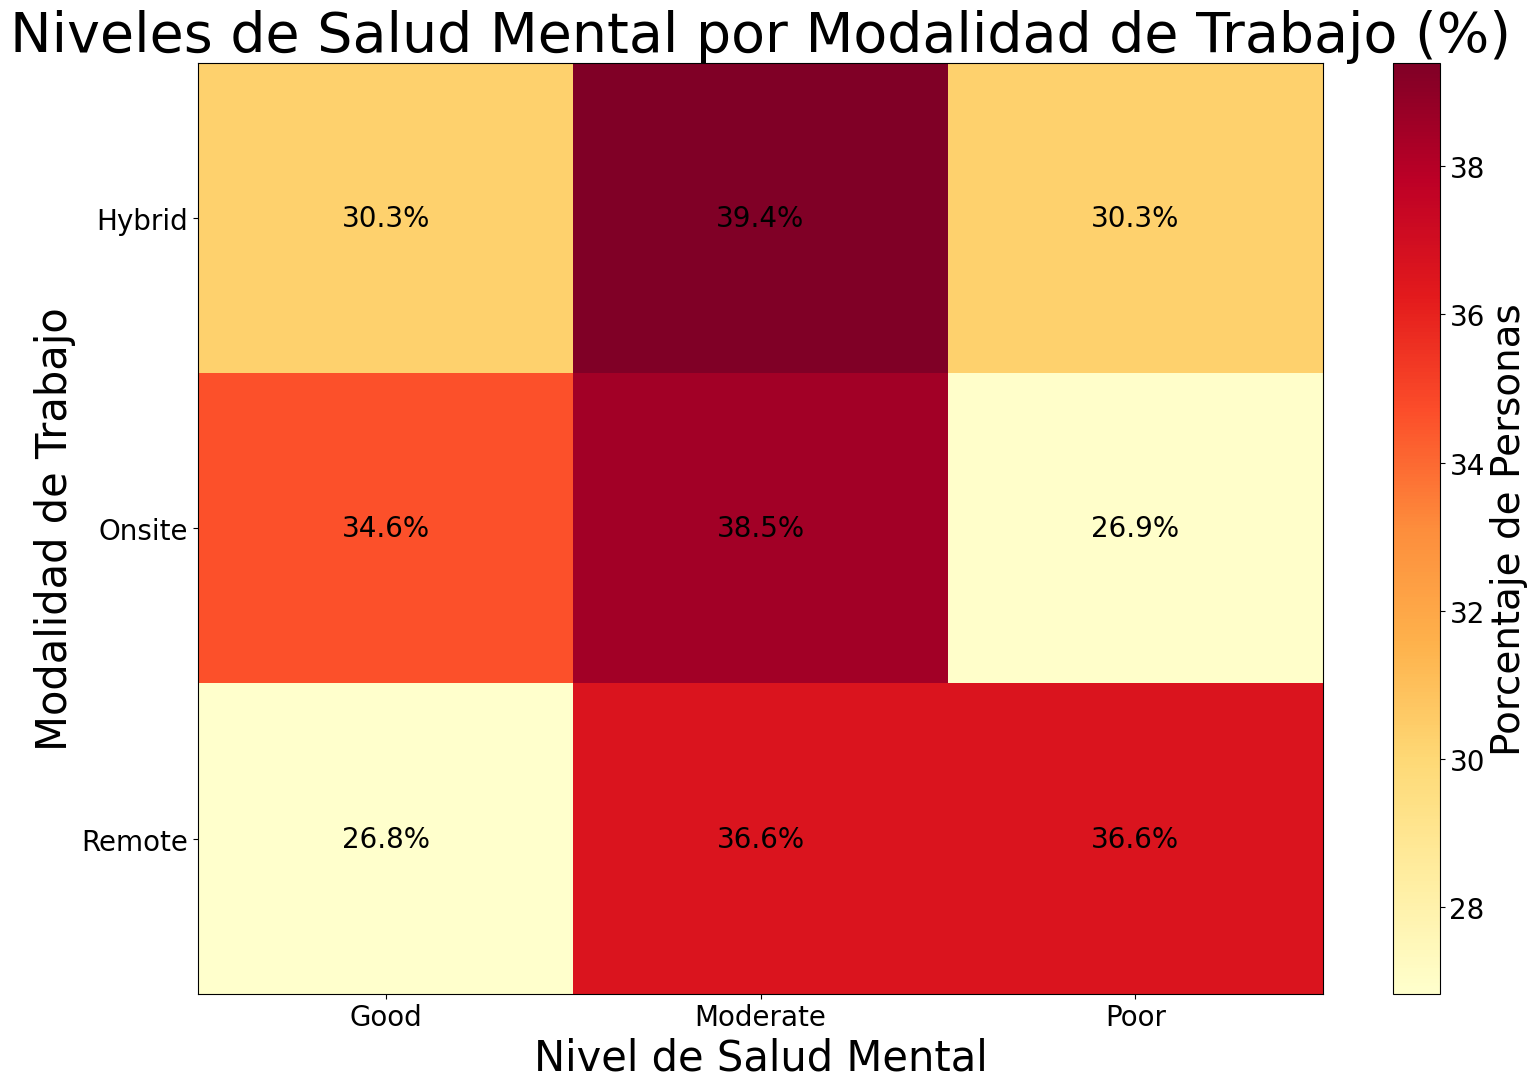

In [26]:
tabla_salud = pd.crosstab(df_mental["Ubicacion_de_Trabajo"], df_mental["Estado_de_Salud_Mental"])

# Convertir a porcentaje por fila
tabla_salud_pct = tabla_salud.div(tabla_salud.sum(axis=1), axis=0) * 100

# Convertir a matriz
data_matrix = tabla_salud_pct.values
labels_x = tabla_salud_pct.columns
labels_y = tabla_salud_pct.index

# Crear figura
plt.figure(figsize=(16, 11))

# Mostrar el heatmap
im = plt.imshow(data_matrix, cmap="YlOrRd", aspect='auto')

# Mostrar los porcentajes en cada celda
for i in range(data_matrix.shape[0]):
    for j in range(data_matrix.shape[1]):
        plt.text(j, i, f"{data_matrix[i, j]:.1f}%", ha='center', va='center', color='black', fontsize=20)

# Configurar etiquetas de los ejes
plt.xticks(range(len(labels_x)), labels_x, fontsize=20)
plt.yticks(range(len(labels_y)), labels_y, fontsize=20)

# Títulos y etiquetas
plt.title("Niveles de Salud Mental por Modalidad de Trabajo (%)", fontsize=40)
plt.xlabel("Nivel de Salud Mental", fontsize=30)
plt.ylabel("Modalidad de Trabajo", fontsize=30)

# Barra de color
cbar = plt.colorbar(im)
cbar.set_label("Porcentaje de Personas", fontsize=28)
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------------

**Gráfico:** Boxplot que compara el `Puntaje_de_Productividad` entre las modalidades **Onsite** (Presencial), **Remote** (Remoto) e **Hybrid** (Híbrida).

Este gráfico nos dice que, en promedio, la gente es **más productiva** cuando trabaja de forma **Híbrida** o **Remota** que cuando está **Presencial**. El modo **Híbrido** es el que gana, lo que sugiere que mezclar la casa y la oficina da los mejores resultados.

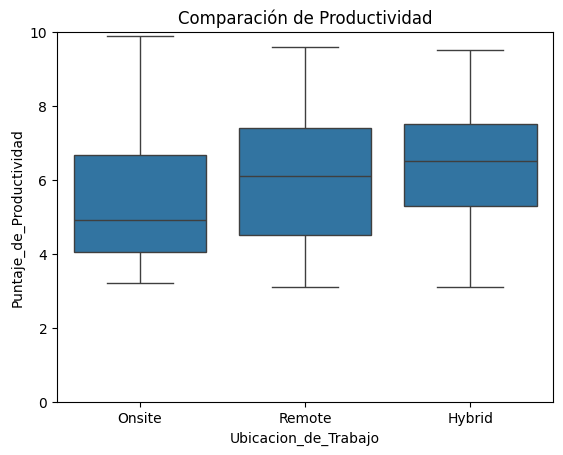

In [27]:
#Puntaje_de_Productividad
sns.boxplot(x="Ubicacion_de_Trabajo", y="Puntaje_de_Productividad", data=df_mental)
plt.title("Comparación de Productividad")
plt.ylim(0,10)
plt.show()

----------------------------------------------------------------------------------------------------------

**Gráfico:** Boxplot que compara la `Calificación_de_Equilibrio_Trabajo_Vida` entre las modalidades **Onsite** (Presencial), **Remote** (Remoto) e **Hybrid** (Híbrida).

Este gráfico muestra que el modo **Remoto** tiene la **mediana más alta** en Calificación de Equilibrio Trabajo/Vida, indicando que la mayoría de sus empleados se sienten mejor balanceados. El modo **Onsite** tiene la mediana más baja. Sin embargo, el modo **Remoto** es el que presenta la **mayor dispersión** (la caja más ancha), lo que significa que en este grupo hay la mayor variación de resultados, incluyendo tanto a los más felices como a los más infelices.

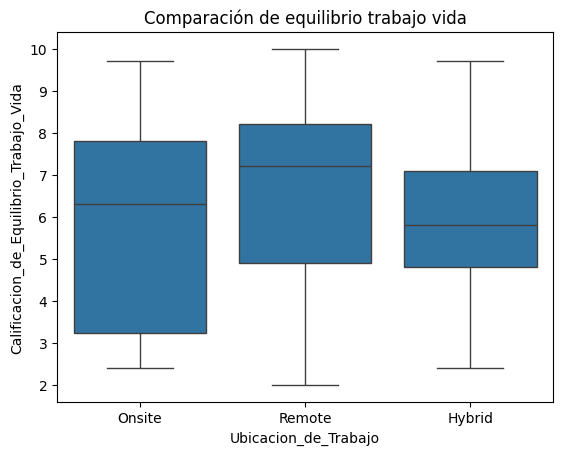

In [28]:
sns.boxplot(x="Ubicacion_de_Trabajo", y="Calificacion_de_Equilibrio_Trabajo_Vida", data= df_mental)
plt.title("Comparación de equilibrio trabajo vida")
plt.show()

----------------------------------------------------------------------------------------------------------

**Gráfico:** Gráfico de barras que compara promedios de Equilibrio Trabajo/Vida, Horas Trabajadas y Productividad por modalidad.

Este gráfico muestra que el modo **Remoto** es el que tiene el **mejor Equilibrio Trabajo/Vida**. El modo **Híbrido** es el más **productivo**, aunque por muy poco. El modo **Onsite** (Presencial) es el que tiene el **peor Equilibrio**. Las horas trabajadas a la semana son muy similares en los tres modos.

<Figure size 1200x700 with 0 Axes>

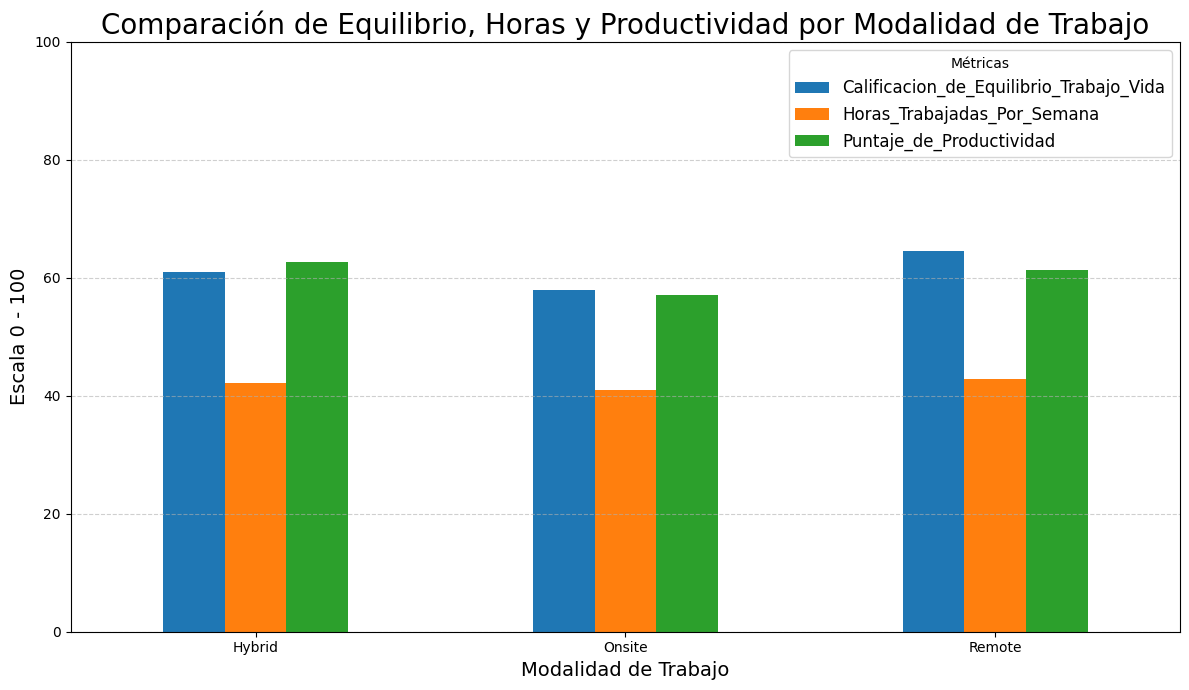

In [29]:
df_temp = df_mental.copy()

# Escalar columnas de 0-10 a 0-100
df_temp["Calificacion_de_Equilibrio_Trabajo_Vida"] = df_temp["Calificacion_de_Equilibrio_Trabajo_Vida"] * 10
df_temp["Puntaje_de_Productividad"] = df_temp["Puntaje_de_Productividad"] * 10

# Calcular promedios por modalidad de trabajo
promedios = df_temp.groupby("Ubicacion_de_Trabajo")[[
    "Calificacion_de_Equilibrio_Trabajo_Vida",
    "Horas_Trabajadas_Por_Semana",
    "Puntaje_de_Productividad"
]].mean()

# Graficar
plt.figure(figsize=(12, 7))
promedios.plot(kind='bar', figsize=(12, 7))

plt.title("Comparación de Equilibrio, Horas y Productividad por Modalidad de Trabajo", fontsize=20)
plt.ylabel("Escala 0 - 100", fontsize=14)
plt.xlabel("Modalidad de Trabajo", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Métricas", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0,100)
plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------------

### Conclusion:

El análisis exploratorio revela una **paradoja principal** en el teletrabajo: la modalidad **Remota** tiene el **mejor Equilibrio Trabajo/Vida y Productividad** promedio, pero a la vez, concentra el **mayor porcentaje de empleados con Salud Mental Pobre**. El modo **Híbrido** es el más productivo. El modelo de trabajo **Presencial (Onsite)** tiene los promedios más bajos en todas las métricas de bienestar y rendimiento.

----------------------------------------------------------------------------------------------------------

### DataFrame impact

In [30]:
# estrés por modalidad de trabajo
tabla_estres = (
    df_impact.groupby(['Ubicacion_de_Trabajo', 'Nivel_de_Estres'])
      .size()                      
      .unstack(fill_value=0)       
)

tabla_estres.index = tabla_estres.index.str.replace('Remote', 'Remoto')
tabla_estres.index = tabla_estres.index.str.replace('Hybrid', 'Híbrido')
tabla_estres.index = tabla_estres.index.str.replace('Onsite', 'Presencial')

tabla_estres = tabla_estres.rename(columns={
    'High': 'Alto',
    'Medium': 'Medio',
    'Low': 'Bajo'
})

# como reubicar las columnas de bajo medio a alto 
tabla_estres = tabla_estres[['Bajo', 'Medio', 'Alto']]
tabla_estres


Nivel_de_Estres,Bajo,Medio,Alto
Ubicacion_de_Trabajo,,,
Híbrido,543,545,561
Presencial,555,547,535
Remoto,547,577,590


In [31]:
# cambiar el orden de las filas tal que sea presencial, híbrido, remoto
tabla_estres = tabla_estres.reindex(['Presencial', 'Híbrido', 'Remoto'])
tabla_estres

Nivel_de_Estres,Bajo,Medio,Alto
Ubicacion_de_Trabajo,,,
Presencial,555,547,535
Híbrido,543,545,561
Remoto,547,577,590


----------------------------------------------------------------------------------------------------------

**Gráfico:** Mapa de calor que muestra el **Porcentaje de Personas** en niveles de Estrés (Bajo, Medio, Alto) según la Modalidad de Trabajo (Presencial, Híbrido, Remoto).

Este gráfico muestra que el mayor porcentaje de estrés **Alto** se concentra en la modalidad **Remota** (34.4%), seguido muy de cerca por la **Híbrida** (34.0%). Por otro lado, la modalidad **Presencial** tiene el mayor porcentaje de personas con estrés **Bajo** (33.9%). Esto refuerza la idea de que, aunque el trabajo remoto es flexible, está asociado a un **mayor riesgo de estrés** en comparación con el trabajo presencial.

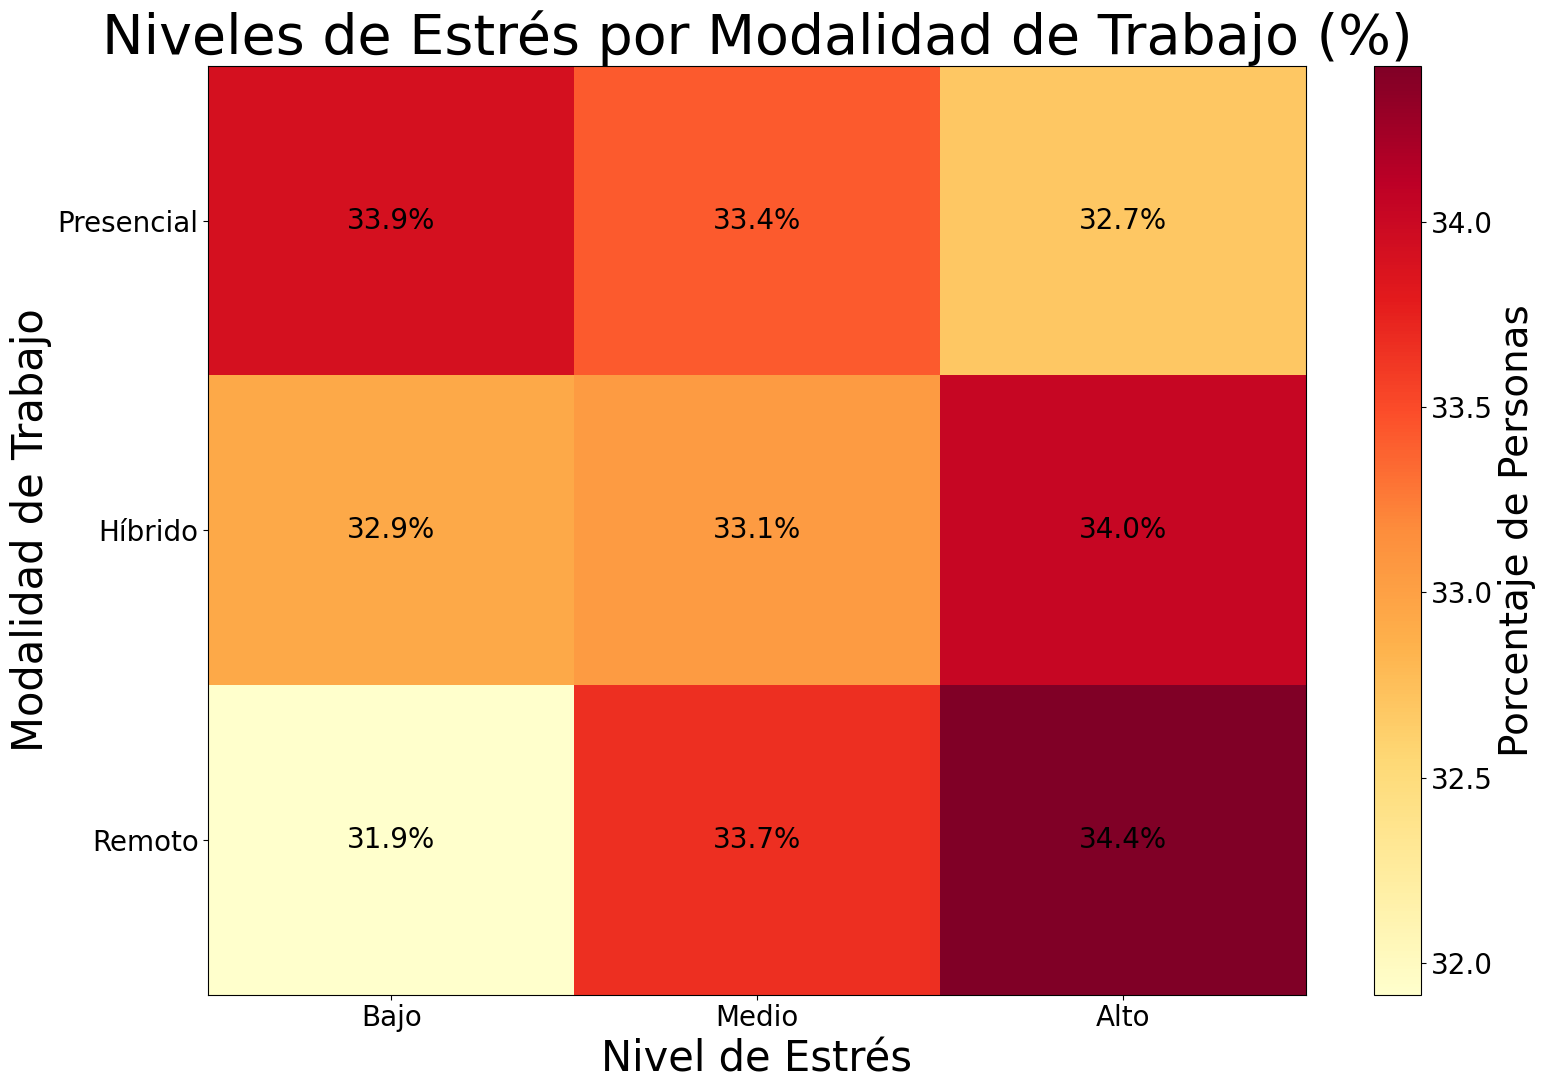

In [ ]:
tabla_estres_pct = tabla_estres.div(tabla_estres.sum(axis=1), axis=0) * 100

# Matriz de datos y etiquetas
data_matrix = tabla_estres_pct.values
labels_x = tabla_estres_pct.columns
labels_y = tabla_estres_pct.index

plt.figure(figsize=(16, 11))

# Mostrar heatmap
im = plt.imshow(data_matrix, cmap="YlOrRd", aspect='auto')

# Mostrar porcentaje en cada celda
for i in range(data_matrix.shape[0]):
    for j in range(data_matrix.shape[1]):
        plt.text(j, i, f"{data_matrix[i, j]:.1f}%", ha='center', va='center', color='black', fontsize=20)

# Configurar ticks y etiquetas
plt.xticks(range(len(labels_x)), labels_x, fontsize=20)
plt.yticks(range(len(labels_y)), labels_y, fontsize=20)

# Título y etiquetas
plt.title("Niveles de Estrés por Modalidad de Trabajo (%)", fontsize=40)
plt.xlabel("Nivel de Estrés", fontsize=30)
plt.ylabel("Modalidad de Trabajo", fontsize=30)

# Barra de color
cbar = plt.colorbar(im)
cbar.set_label("Porcentaje de Personas", fontsize=28)
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

---

**Gráfico:** Tres gráficos de barras que muestran la **Cantidad de Personas** en niveles de Estrés (**Alto, Medio, Bajo**) según la Modalidad de Trabajo (Presencial, Híbrido, Remoto).

La modalidad **Remota** concentra el **mayor número de personas** con Estrés **Alto**. Esto sugiere que, si bien el trabajo remoto es flexible, está asociado a más casos absolutos de estrés.

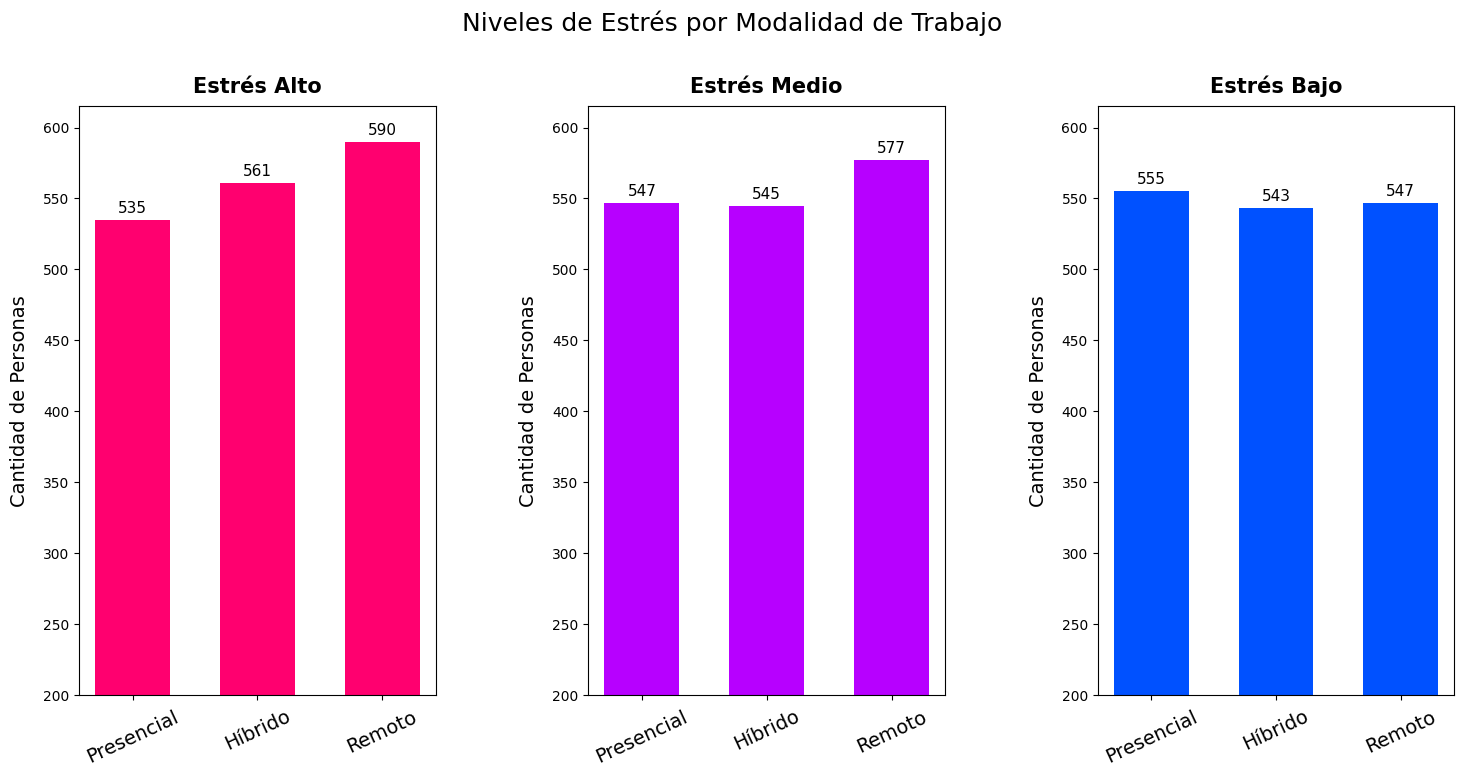

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
niveles_estres = ['Alto', 'Medio', 'Bajo']

# Recorrer cada nivel de estrés y crear un gráfico para cada uno
for i, nivel in enumerate(niveles_estres):
    grafico_actual = axes[i]
    datos_nivel = tabla_estres[nivel]
    colores = ["#ff006f", "#b700ff", "#0051ff"]
    color_actual = colores[i]
    
    barras = grafico_actual.bar(datos_nivel.index, datos_nivel.values, color=color_actual, width=0.6) #.bar funcion matplotlib
    # datos_nivel.index = nombres modalidades [Híbrido, Presencial, Remoto] 
    # datos_nivel.values = cantidades [282, 282, 304]
    
    grafico_actual.set_title(f'Estrés {nivel}', fontsize=15, pad=10, fontweight='bold')
    grafico_actual.set_ylabel('Cantidad de Personas', fontsize=14, labelpad=10)
    
    valor_maximo = tabla_estres.values.max()
    grafico_actual.set_ylim(200, valor_maximo + 25)  #scala al máximo+20
    grafico_actual.tick_params(axis='x', rotation=25, labelsize=14, pad=5)
    
    #número encima de cada barra
    for barra in barras:
        altura_barra = barra.get_height()
        posicion_x = barra.get_x() + barra.get_width()/2 #centro de la barra
        posicion_y = altura_barra + 3
        
        # escribir el número en esa posición
        grafico_actual.text(posicion_x, posicion_y, f'{int(altura_barra)}', 
                          ha='center', va='bottom', fontsize=11)

plt.suptitle('Niveles de Estrés por Modalidad de Trabajo', fontsize=18)
plt.tight_layout(pad=2, w_pad=6)
plt.show()

---
**Gráfico:** Gráfico de barras que compara el `Promedio de Nivel de Estrés` según el `Rango de horas por semana` y la `Modalidad` de trabajo.

Este gráfico nos dice que el nivel promedio de Estrés se mantiene **prácticamente igual** (cerca del nivel Medio) sin importar **cuántas horas trabajes** a la semana, y sin importar si estás Presencial, Remoto o Híbrido. La única tendencia leve es que el estrés sube un poco al llegar al rango de **50–60 horas**, especialmente en el modo **Remoto**.

C:\Users\gabri\AppData\Local\Temp\ipykernel_340\3846209740.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp.groupby(["Ubicacion_de_Trabajo", "Rango_de_horas"])["Nivel_de_agotamiento_num"]
C:\Users\gabri\AppData\Local\Temp\ipykernel_340\3846209740.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


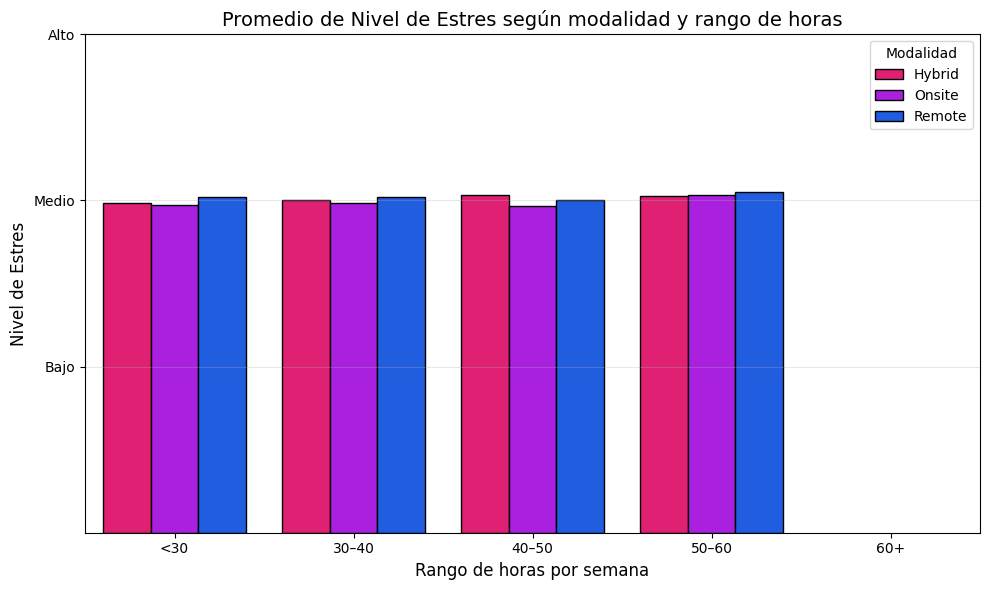

In [34]:
df_temp = df_impact.copy()
df_temp.columns = df_temp.columns.str.strip().str.normalize("NFKD").str.encode("ascii", errors="ignore").str.decode("utf-8")

# Mapear niveles de agotamiento a números
nivel_map = {"Low": 1, "Medium": 2, "High": 3}
df_temp["Nivel_de_agotamiento_num"] = df_temp["Nivel_de_Estres"].map(nivel_map)

# Crear rangos de horas trabajadas
df_temp["Rango_de_horas"] = pd.cut(
    df_temp["Horas_Trabajadas_Por_Semana"],
    bins=[0, 30, 40, 50, 60, 80],
    labels=["<30", "30–40", "40–50", "50–60", "60+"]
)

# Agrupar los datos
tabla = (
    df_temp.groupby(["Ubicacion_de_Trabajo", "Rango_de_horas"])["Nivel_de_agotamiento_num"]
    .mean()
    .reset_index()
)



# Crear gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tabla,
    x="Rango_de_horas",
    y="Nivel_de_agotamiento_num",
    hue="Ubicacion_de_Trabajo",
    palette=colores,
    edgecolor="black",
    ci=None
)

# Personalizar ejes y título
plt.ylim(0, 3)
plt.yticks([1, 2, 3], ["Bajo", "Medio", "Alto"])
plt.title("Promedio de Nivel de Estres según modalidad y rango de horas", fontsize=14)
plt.xlabel("Rango de horas por semana", fontsize=12)
plt.ylabel("Nivel de Estres", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.legend(title="Modalidad", fontsize=10)
plt.tight_layout()
plt.show()

---
**Gráfico:** Gráfico de barras que compara el `Promedio de Calificación de Equilibrio Vida-Trabajo` (en una escala de 1 a 5) según la Modalidad de Trabajo.

Este gráfico muestra que el promedio de Equilibrio Vida-Trabajo es **prácticamente el mismo** para las tres modalidades, todas alrededor de **3.0**. El modo **Híbrido** es solo ligeramente mejor (3.02) que el Remoto (2.98) y el Presencial (2.95). La diferencia entre los grupos es **mínima**.

C:\Users\gabri\AppData\Local\Temp\ipykernel_340\877123703.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


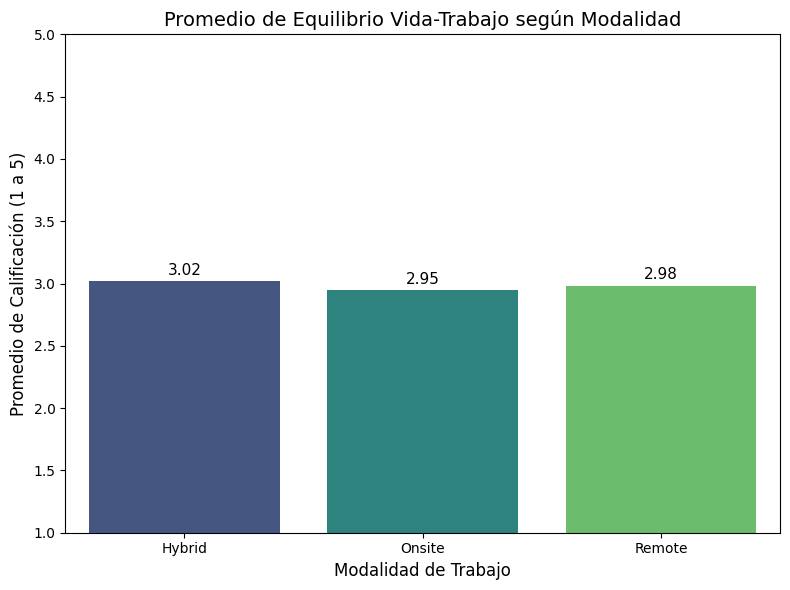

In [35]:
df_prom = (
    df_impact.groupby('Ubicacion_de_Trabajo')['Calificacion_de_Equilibrio_Trabajo_Vida']
      .mean()
      .reset_index()
)

# Gráfico
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_prom,
    x='Ubicacion_de_Trabajo',
    y='Calificacion_de_Equilibrio_Trabajo_Vida',
    palette='viridis'
)

# Títulos y etiquetas
plt.title('Promedio de Equilibrio Vida-Trabajo según Modalidad', fontsize=14)
plt.xlabel('Modalidad de Trabajo', fontsize=12)
plt.ylabel('Promedio de Calificación (1 a 5)', fontsize=12)
plt.ylim(1, 5)

# Mostrar valores sobre las barras
for i, row in enumerate(df_prom['Calificacion_de_Equilibrio_Trabajo_Vida']):
    plt.text(i, row + 0.05, f"{row:.2f}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

---
**Gráfico:** Gráfico de barras que compara la `Calificación de Equilibrio Vida-Trabajo` según la `Modalidad` y el `Rango de horas por semana`.

Este gráfico nos dice que el promedio de Equilibrio Vida-Trabajo se mantiene **casi igual** para todos los rangos de horas y modos, con puntuaciones cercanas a 3.0. y **Remoto** sobre sale entre las 50-60 horas al igual que **Hibrido** entre las 40-50 y presencial no sobresale en ningun rango.

C:\Users\gabri\AppData\Local\Temp\ipykernel_340\2488174065.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_temp.groupby(
C:\Users\gabri\AppData\Local\Temp\ipykernel_340\2488174065.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


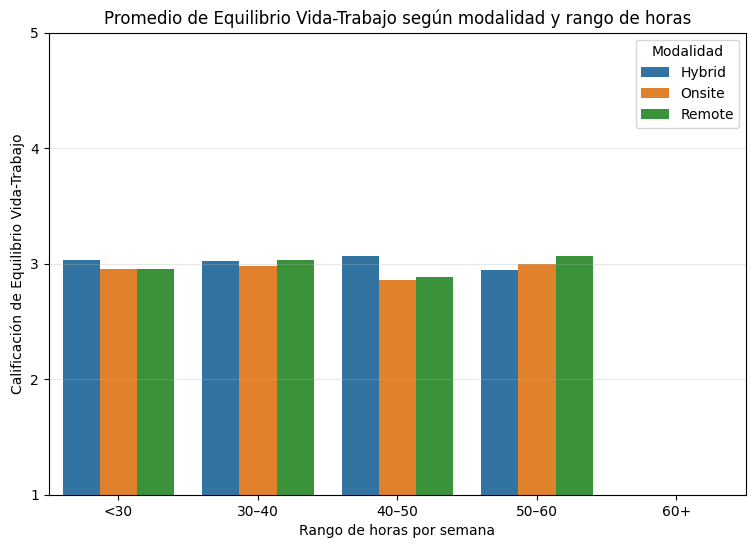

In [36]:
df_temp = df_impact.copy()
df_temp.columns = df_temp.columns.str.strip()

# Crear rangos de horas trabajadas
df_temp["Rango_de_horas"] = pd.cut(
    df_temp["Horas_Trabajadas_Por_Semana"],
    bins=[0,30,40,50,60,80],
    labels=["<30","30–40","40–50","50–60","60+"]
)

# Calcular promedio de Calificación de Equilibrio Vida-Trabajo
tabla = df_temp.groupby(
    ["Ubicacion_de_Trabajo", "Rango_de_horas"]
)["Calificacion_de_Equilibrio_Trabajo_Vida"].mean().reset_index()

# Gráfico con colores más visibles
plt.figure(figsize=(9,6))
sns.barplot(
    data=tabla,
    x="Rango_de_horas",
    y="Calificacion_de_Equilibrio_Trabajo_Vida",
    hue="Ubicacion_de_Trabajo",
    ci=None
)

plt.ylim(1,5)
plt.yticks([1,2,3,4,5])
plt.title("Promedio de Equilibrio Vida-Trabajo según modalidad y rango de horas")
plt.xlabel("Rango de horas por semana")
plt.ylabel("Calificación de Equilibrio Vida-Trabajo")
plt.grid(axis="y", alpha=0.3)
plt.legend(title="Modalidad")

plt.show()

---

### DataFrame Survey

---
**Gráfico:** Gráfico de barras que muestra la distribución porcentual del Estrés (High, Low, Medium) según la Modalidad de Trabajo.

* El modo **Remoto** tiene el **mayor porcentaje de Estrés Alto** (46.4%), siendo la categoría más grande para ese grupo.
* El modo **Presencial** (*Onsite*) tiene el mayor porcentaje de Estrés **Medium** (43.4%), pero el más bajo en Estrés Alto (26.4%).

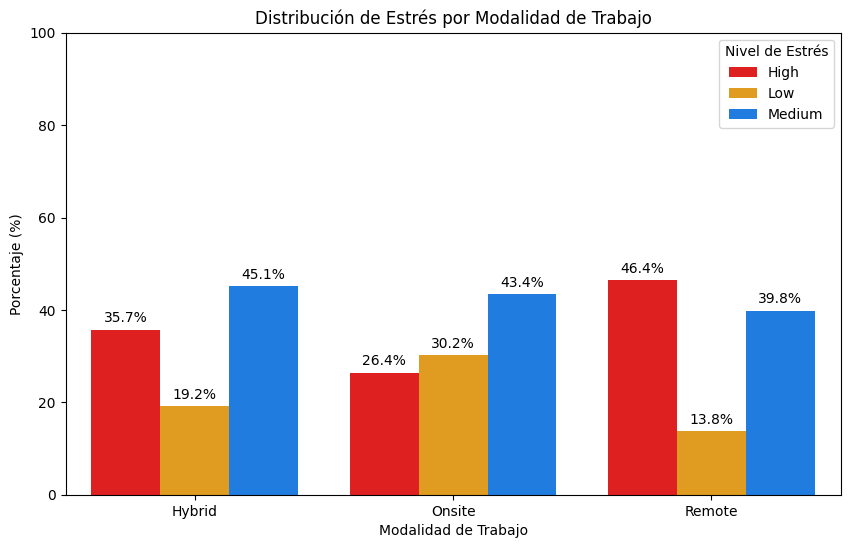

In [37]:
# Copiar y limpiar columnas
df_temp = df_survey.copy()
df_temp.columns = df_temp.columns.str.strip().str.normalize("NFKD").str.encode("ascii", errors="ignore").str.decode("utf-8")

# Crear tabla de conteos y porcentajes
tabla = pd.crosstab(df_temp["Ubicacion_de_Trabajo"], df_temp["Nivel_de_Estres"])
tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100

# Transformar para seaborn
tabla_pct = tabla_pct.reset_index().melt(id_vars="Ubicacion_de_Trabajo",
                                         var_name="Nivel_de_Estres",
                                         value_name="Porcentaje")

# Graficar
plt.figure(figsize=(10,6))
ax = sns.barplot(data=tabla_pct,
                 x="Ubicacion_de_Trabajo",
                 y="Porcentaje",
                 hue="Nivel_de_Estres",
                 palette=["#ff0000","#ffa500","#007bff"])

plt.ylim(0,100)
plt.title("Distribución de Estrés por Modalidad de Trabajo")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Modalidad de Trabajo")
plt.legend(title="Nivel de Estrés")

# Mostrar números solo si hay valor mayor que 0
for p in ax.patches:
    if p.get_height() > 0:
        ax.text(p.get_x() + p.get_width()/2, p.get_height() + 1,
                f'{p.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

---
**Gráfico:** Gráfico de barras que compara el `Promedio de aislamiento social` (escala 1 a 5) según la `Modalidad` y el `Rango de horas por semana`.

* El modo **Remoto** muestra consistentemente el **mayor promedio de Aislamiento Social** en todos los rangos de horas (cercano a 3.5 en escala 1-5).
* El modo **Presencial** (*Onsite*) muestra el **menor promedio de Aislamiento Social** en todos los rangos de horas.
* El **Rango de Horas** influye muy poco en el aislamiento; la diferencia clave la establece la **Modalidad**.

C:\Users\gabri\AppData\Local\Temp\ipykernel_340\3066505428.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Ubicacion_de_Trabajo", "Rango_de_horas"])["Calificacion_de_Aislamiento_Social"]


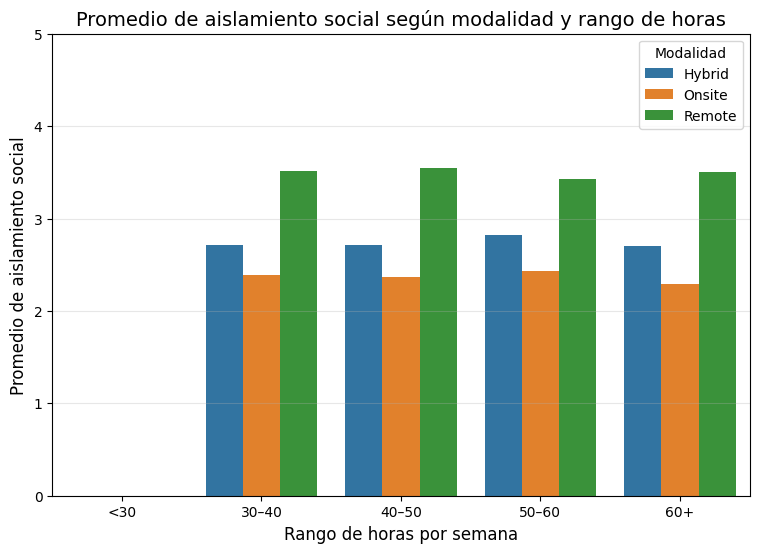

In [38]:
rango_horas = pd.cut(
    df_survey["Horas_Trabajadas_Por_Semana"],
    bins=[0, 30, 40, 50, 60, 80],
    labels=["<30", "30–40", "40–50", "50–60", "60+"]
)

tabla_aislamiento = (
    df_survey
    .assign(Rango_de_horas=rango_horas)
    .groupby(["Ubicacion_de_Trabajo", "Rango_de_horas"])["Calificacion_de_Aislamiento_Social"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(9, 6))
sns.barplot(
    data=tabla_aislamiento,
    x="Rango_de_horas",
    y="Calificacion_de_Aislamiento_Social",
    hue="Ubicacion_de_Trabajo",
)

plt.title("Promedio de aislamiento social según modalidad y rango de horas", fontsize=14)
plt.xlabel("Rango de horas por semana", fontsize=12)
plt.ylabel("Promedio de aislamiento social", fontsize=12)
plt.ylim(0,5)
plt.grid(axis="y", alpha=0.3)
plt.legend(title="Modalidad")
plt.show()

---
**Gráfico:** Gráfico de barras que compara la `Calificación de Equilibrio Vida-Trabajo` (escala 1 a 5) según la `Modalidad` y el `Rango de horas por semana`.

* El promedio de Equilibrio es **casi idéntico** para todos los rangos de horas y modalidades, agrupándose cerca de **3.0**.
* La diferencia es **mínima**, siendo el modo **Remoto** o **Híbrido** ligeramente superior en la mayoría de los rangos.

C:\Users\gabri\AppData\Local\Temp\ipykernel_340\1342615613.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Ubicacion_de_Trabajo", "Rango_de_horas"])["Calificacion_de_Equilibrio_Trabajo_Vida"]


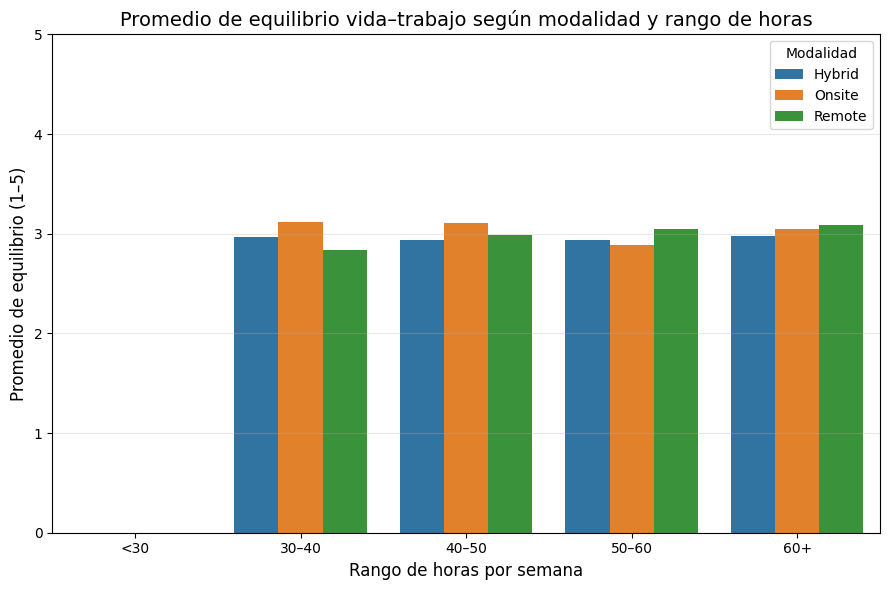

In [39]:
tabla_equilibrio = (
    df_survey
    .assign(Rango_de_horas=rango_horas)
    .groupby(["Ubicacion_de_Trabajo", "Rango_de_horas"])["Calificacion_de_Equilibrio_Trabajo_Vida"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(9, 6))
sns.barplot(
    data=tabla_equilibrio,
    x="Rango_de_horas",
    y="Calificacion_de_Equilibrio_Trabajo_Vida",
    hue="Ubicacion_de_Trabajo"
)

plt.title("Promedio de equilibrio vida–trabajo según modalidad y rango de horas", fontsize=14)
plt.xlabel("Rango de horas por semana", fontsize=12)
plt.ylabel("Promedio de equilibrio (1–5)", fontsize=12)
plt.ylim(0, 5)
plt.grid(axis="y", alpha=0.3)
plt.legend(title="Modalidad")
plt.tight_layout()
plt.show()

---
---

**Conclusión:**
---
El modo **Remoto** muestra la **mejor Productividad y Equilibrio**, pero concentra el **mayor riesgo de Estrés, Aislamiento, y Salud Mental Pobre**. La **Modalidad de Trabajo** es el predictor principal del riesgo, siendo las **Horas Trabajadas** de baja influencia.
---
---